In [1]:
import time
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer as DV

In [2]:
bank_data = pd.read_csv("data/bank-full.csv",delimiter=';')
features = list(bank_data.columns.values)
numeric_col = ['age','balance','day','duration','campaign','pdays','previous']
x_num_train = bank_data[numeric_col].as_matrix()

#categorical columns
bank_train = bank_data.drop(numeric_col+['y'],axis = 1)
x_bank_train = bank_train.T.to_dict().values()

#vectorize
vectorizer = DV( sparse = False )
vec_x_bank_train = vectorizer.fit_transform( x_bank_train )
feature_train = np.hstack(( x_num_train, vec_x_bank_train ))

#y
label_train = bank_data.as_matrix(columns=['y'])

# sample part of data to reduce computing time
train_X,test_X,train_y,test_y = train_test_split(feature_train,label_train,test_size=0.5,random_state=0)

train_X,test_X,train_y,test_y = train_test_split(train_X,train_y,test_size=0.2,random_state=0)
train_X,val_X,train_y,val_y = train_test_split(train_X,train_y,test_size=0.2,random_state=0)



C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [3]:
K_accuracy = dict()

In [8]:
for k in range(1,40):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X,train_y)
    predicted= model.predict(val_X)
    val_accuracy = accuracy_score(predicted, val_y)
    K_accuracy[k] = val_accuracy

C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversion

C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversion

k =  1  accuracy =  0.8512579485761681
k =  2  accuracy =  0.8824993088194636
k =  3  accuracy =  0.8780757533867847
k =  4  accuracy =  0.8863699198230578
k =  5  accuracy =  0.8858169753939729
k =  6  accuracy =  0.8838816698921759
k =  7  accuracy =  0.8880287531103124
k =  8  accuracy =  0.88775228089577
k =  9  accuracy =  0.8858169753939729
k =  10  accuracy =  0.8838816698921759
k =  11  accuracy =  0.885264030964888
k =  12  accuracy =  0.8830522532485485
k =  13  accuracy =  0.8844346143212607
k =  14  accuracy =  0.8841581421067183
k =  15  accuracy =  0.8855405031794304
k =  16  accuracy =  0.8847110865358031
k =  17  accuracy =  0.8844346143212607
k =  18  accuracy =  0.885264030964888
k =  19  accuracy =  0.8855405031794304
k =  20  accuracy =  0.8866463920376002
k =  21  accuracy =  0.88775228089577
k =  22  accuracy =  0.8866463920376002
k =  23  accuracy =  0.8885816975393973
k =  24  accuracy =  0.8855405031794304
k =  25  accuracy =  0.8869228642521426
k =  26  accura

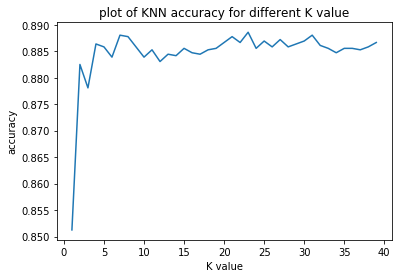

In [9]:
for k,v in K_accuracy.items():
    print("k = ",k," accuracy = ",v)

plt.plot(range(1,40),K_accuracy.values())
plt.xlabel('K value')
plt.ylabel('accuracy')
plt.title('plot of KNN accuracy for different K value')
plt.show()

In [10]:
sorted_K_accuracy = sorted(K_accuracy.items(), key=lambda kv: kv[1],reverse=True)
for k,v in sorted_K_accuracy:
    print("k = ",k," accuracy = ",v)


k =  23  accuracy =  0.8885816975393973
k =  7  accuracy =  0.8880287531103124
k =  31  accuracy =  0.8880287531103124
k =  8  accuracy =  0.88775228089577
k =  21  accuracy =  0.88775228089577
k =  27  accuracy =  0.8871993364666851
k =  25  accuracy =  0.8869228642521426
k =  30  accuracy =  0.8869228642521426
k =  20  accuracy =  0.8866463920376002
k =  22  accuracy =  0.8866463920376002
k =  39  accuracy =  0.8866463920376002
k =  4  accuracy =  0.8863699198230578
k =  29  accuracy =  0.8863699198230578
k =  32  accuracy =  0.8860934476085154
k =  5  accuracy =  0.8858169753939729
k =  9  accuracy =  0.8858169753939729
k =  26  accuracy =  0.8858169753939729
k =  28  accuracy =  0.8858169753939729
k =  38  accuracy =  0.8858169753939729
k =  15  accuracy =  0.8855405031794304
k =  19  accuracy =  0.8855405031794304
k =  24  accuracy =  0.8855405031794304
k =  33  accuracy =  0.8855405031794304
k =  35  accuracy =  0.8855405031794304
k =  36  accuracy =  0.8855405031794304
k =  11  

In [12]:
start = time.clock()
model = KNeighborsClassifier(n_neighbors=sorted_K_accuracy[0][0])
model.fit(train_X,train_y)
elapsed = (time.clock() - start)
print("knn model accuracy: ",accuracy_score(model.predict(test_X),test_y),"time used: ",elapsed)

C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


knn model accuracy:  0.8889626188896262 time used:  0.07720510000000047
